In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

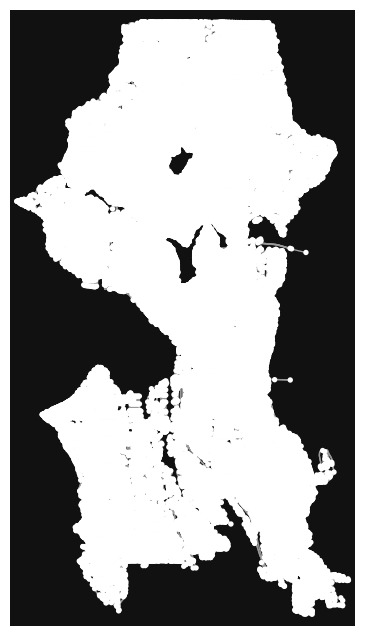

In [2]:
# Specify the name that is used to seach for the data
# place_name = "Oradell, New Jersey, USA"
place_name = "Seattle, Washington, USA"
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
# Plot the streets
fig, ax = ox.plot_graph(graph)

<Axes: >

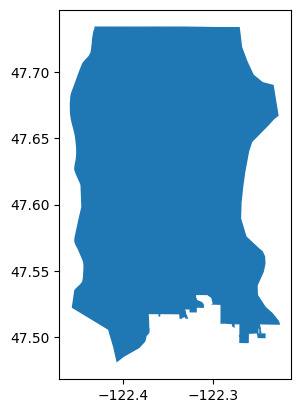

In [3]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
area.plot()

Buildings

In [4]:
# List key-value pairs for tags
tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)

buildings = buildings.drop(['nodes','ways'], axis=1)

buildings.to_file("Seattle_buildings.geojson", driver='GeoJSON')

# tags = {'sidewalk': True}
# sidewalks = ox.geometries_from_place(place_name, tags)
buildings.plot(color="gray")

KeyboardInterrupt: 

Churchs

<Axes: >

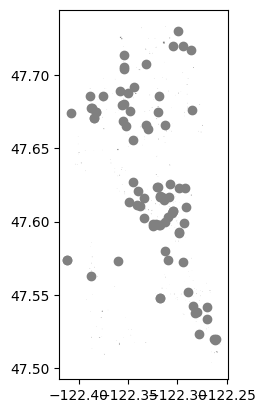

In [37]:
tags = {
    'amenity': ['place_of_worship'],
    'historic': ['church']
}


churchs = ox.geometries_from_place(place_name, tags)
churchs = churchs.drop(['nodes','ways'], axis=1)

# churchs.to_file("Seattle_churchs.geojson", driver='GeoJSON')

churchs.plot(color="gray")

Grocery Stores & Supermarkets

<Axes: >

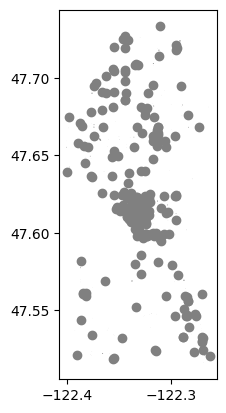

In [38]:
tags = {
    # 'landuse': ['retail'],
    'shop': ['convenience', 'supermarket'],
    'building': ['supermarket']
}


grocery = ox.geometries_from_place(place_name, tags)
grocery = grocery.drop(['nodes','ways'], axis=1)

grocery.plot(color="gray")

# grocery.to_file("Seattle_stores.geojson", driver='GeoJSON')

Schools

<Axes: >

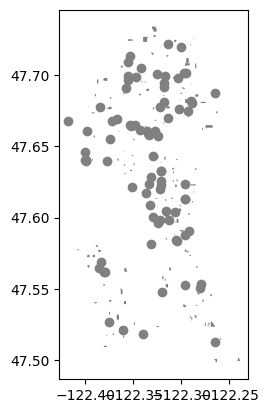

In [39]:
tags = {
    'amenity': ['music_school', 'language_school', 'drive_school', 'school', 'childcare'],
    'military': ['school'],
    'building': ['school']
}


schools = ox.geometries_from_place(place_name, tags)
schools = schools.drop(['nodes','ways'], axis=1)
schools.plot(color="gray")

# schools.to_file("Seattle_schools.geojson", driver='GeoJSON')

Pharmacy

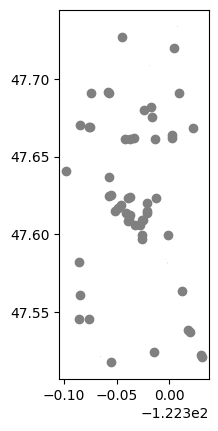

In [15]:
tags = {
    'amenity': ['pharmacy'],
    'shop': ['chemist'],
}


pharmacy = ox.geometries_from_place(place_name, tags)
pharmacy = pharmacy.drop(['nodes','ways'], axis=1)

pharmacy.plot(color="gray")

pharmacy.to_file("Seattle_pharmacies.geojson", driver='GeoJSON')

Library

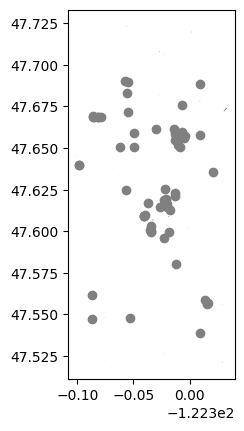

In [16]:
tags = {
    'amenity': ['toy_library', 'library'],
    'shop': ['books'],
}


libraries = ox.geometries_from_place(place_name, tags)
libraries = libraries.drop(['nodes','ways'], axis=1)

libraries.plot(color="gray")

libraries.to_file("Seattle_libraries.geojson", driver='GeoJSON')

Hospital

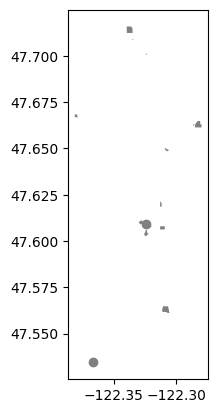

In [33]:
tags = {
    'amenity': ['hospital'],
    'building': ['hospital']
}


hospitals = ox.geometries_from_place(place_name, tags)
hospitals = hospitals.drop(['nodes', 'ways'], axis=1)

hospitals.plot(color="gray")

hospitals.to_file("Seattle_hospitals.geojson", driver='GeoJSON')

Parks

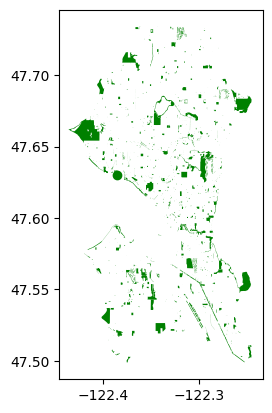

In [35]:
# List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass'}
# Get the data
parks = ox.geometries_from_place(place_name, tags)
parks = parks.drop(['nodes', 'ways'], axis=1)

parks.plot(color="green")

parks.to_file("Seattle_parks.geojson", driver='GeoJSON')

(-122.47145914999999, -122.21266985000001, 47.46834509, 47.74680151)

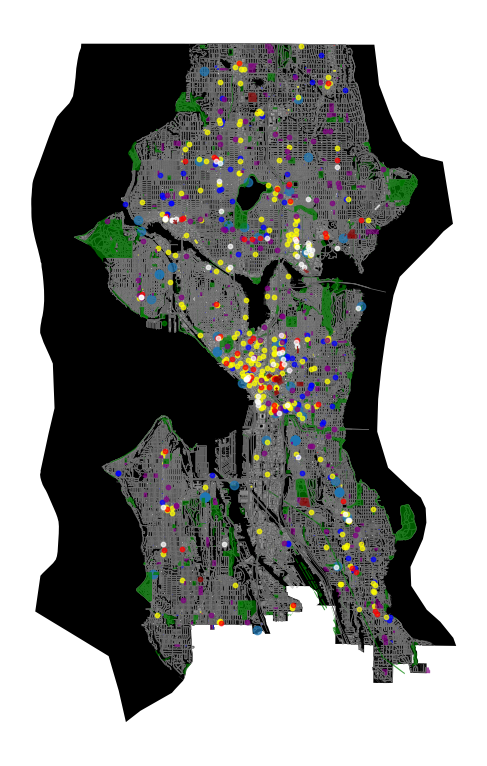

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
# Plot the footprint
area.plot(ax=ax, facecolor='black', zorder=0)
# Plot street edges
edges.plot(ax=ax, linewidth=0.5, edgecolor='dimgray', zorder=1)
# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7, zorder=2)
# Plot parks
parks.plot(ax=ax, color='green', alpha=0.7, markersize=10, zorder=3)

#Plot churchs grocery schools pharmacy libraries hospitals
churchs.plot(ax=ax, color='blue', alpha=0.7, markersize=10, zorder=4)
grocery.plot(ax=ax, color='yellow', alpha=0.7, markersize=10, zorder=4)
schools.plot(ax=ax, color='purple', alpha=0.7, markersize=10, zorder=4)
pharmacy.plot(ax=ax, color='red', alpha=0.7, markersize=10, zorder=4)
libraries.plot(ax=ax, color='white', alpha=0.7, markersize=10, zorder=4)
hospitals.plot(ax=ax, color='darkred', alpha=0.7, markersize=10, zorder=4)

# plt.xlim((-4.05, -4.01))
# plt.ylim((39.89, 39.85))

plt.tight_layout()
plt.axis('off')